In [1]:
import numpy as np

import pandas as pd

In [3]:
file  = pd.read_csv("src_placido_img_00003_Thershold_Findings.csv")

In [31]:
def paramsOfKeratoscope():
    l = [13,17.3,21.8,25.8,30.3,34,38.4,42.4,46.6,50.3,54.6,58.5,62.8,67.6,71.7,76.3,84.8,80.3,89,92.8,96.3,100.6,116.5] 
    m = [8,9.2,12.2,15.4,18.2,21.5,24,27.1,30,32.9,35.5,38.6,41.4,44.5,47.8,50.7,53.9,56.8,60,62.9,65.6,68.1,71.2]
    d = 72
    R = 116.5
    return(l,m,d,R)

In [48]:
def cornealProfile(file_name , parametersOfKeratoscope):
    '''
    input:
        file_name =  name of the CSV file in str
        parametersOfKeratoscope = parameters of Keratoscope
        
    output:
        file = DataFrame having corneal profile; height as z
        
    
    '''
    
    
    # Parameters of the Keratoscope
    l, m, d, R = paramsOfKeratoscope()
    
    file = pd.read_csv(file_name + ".csv")
    
    for ang in range(360):
        temp_file = file[file[" Angle"] == ang]
        r = temp_file[" radius"]
        
        
        r0 = 0; #(write as r)
        z0 = 7.8; # radius of cornea # (write as z)
        T0 = 0; # slope of tanget 
        z = z0;
        
        A = np.arctan(l/((d+z0)-np.array(m)))
        T = A/2
        T = np.insert(T, 0,0)
        
        r = np.array(r)
        r = np.insert(r , 0,0)
        r_trans = x = 0.021739*r
        
        
        
        z = [z0]
        for i in range(len(r)-2):
            for j in range(5):
                z_next = z[i] + (r_trans[i+1]-r_trans[i])*(np.cos(T[i+1])-np.cos(T[i]))/(np.sin(T[i]) - np.sin(T[i+1]))
                
                num = (4*(R**2)*(np.sin(A[i]/2)**2) - 
                       ((R-z_next)**2 + r_trans[i+1]**2) - 
                       (R*np.sin(A[i]) - r_trans[i+1])**2 -
                       (R*np.cos(A[i])-z_next)**2)
                
                denom = ((-2)*np.sqrt((R-z_next)**2 + r_trans[i+1]**2) * 
                         (np.sqrt((R*np.sin(A[i]) - r_trans[i+1])**2 + (R*np.cos(A[i])-z_next)**2)))
                a = num/denom
                
                t = np.pi/2 - a/2 - np.arctan((R*np.cos(A[i])-z_next)/ (R*np.sin(A[i]) - r_trans[i+1]))
                T[i+1] = t
            z.append(z_next)
        file.loc[file[" Angle"] == ang , "z"] = z
    return(file)



In [49]:
file_name = "src_placido_img_00003_Thershold_Findings"
parametersOfKeratoscope = paramsOfKeratoscope()
file = cornealProfile(file_name , parametersOfKeratoscope)

In [50]:
file["z"]

0        7.800000
1        7.800000
2        7.800000
3        7.800000
4        7.800000
          ...    
7195    11.976475
7196    12.052080
7197    12.030574
7198    11.893532
7199    11.912720
Name: z, Length: 7200, dtype: float64

In [51]:
from mpl_toolkits import mplot3d

%matplotlib inline

import matplotlib.pyplot as plt

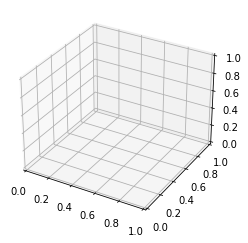

In [54]:
fig = plt.figure()
ax = plt.axes(projection='3d')

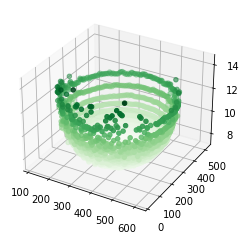

In [57]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = file["z"]
xdata = file[" x"]
ydata = file[" y"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

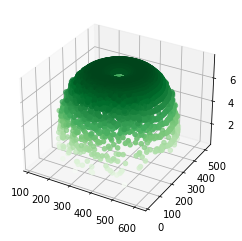

In [60]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = 15 - file["z"]
xdata = file[" x"]
ydata = file[" y"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');